# An Introduction to Gaussian Processes


## Motivation

A common applied statistics task involves building regression models to characterize non-linear relationships between variables. It is possible to fit such models by assuming a particular non-linear functional form, such as a sinusoidal, exponential, or polynomial function, to describe one variable's response to the variation in another. Unless this relationship is obvious from the outset, however, it involves possibly extensive model selection procedures to ensure the most appropriate model is retained. 

Alternatively, a **non-parametric** approach can be adopted by defining a set of knots across the variable space and use a spline or kernel regression to describe arbitrary non-linear relationships. However, knot layout procedures are somewhat ad hoc and can also involve variable selection. 

A third alternative is to adopt a **Bayesian** non-parametric strategy, and directly model the unknown underlying function. For this, we can employ **Gaussian process** models.

## Gaussian Processes

Gaussian process is essentially an handy tool for Bayesian inferences on real valued variables. A Gaussian process is a powerful model that can be used to represent a distribution over functions. While most modern machine learning techniques tend to parametise functions and then model these parameters, Gaussian processes are non-parametric models  that model the functions directly. 

## Bayesian Statistics

Many people who have taken a statistics course may not have had a course in *Bayesian* statistics. Most introductory statistics courses, particularly for non-statisticians like myself, still do not cover Bayesian methods at all, except perhaps to derive Bayes' formula as a trivial rearrangement of the definition of conditional probability. Even today, Bayesian courses are typically tacked onto the curriculum, rather than being integrated into the program.

In fact, Bayesian statistics is not just a particular method, or even a class of methods; it is an entirely different paradigm for doing statistical analysis.

> Practical methods for making inferences from data using probability models for quantities we observe and about which we wish to learn.
*-- Gelman et al. 2013*

A Bayesian model is described by parameters, uncertainty in those parameters is described using probability distributions.

All conclusions from Bayesian statistical procedures are stated in terms of *probability statements*

![](images/prob_model.png)


As a toy example, a child has a prior belief of how a sheep will look like. Later after taking a trip to a countryside with the parents, the parents point at a sheep to the child and say look there is a sheep over there. The child sees the sheep and gets a label. At this point, the child will update his prior belief based on the actual picture of the sheep. The child then combines the initial belief with the actual picture to get a new belief of what a sheep looks like. 

In Bayesian inference, the initial belief of the child of what a sheep may look like is called the **prior**. The updated belief after seeing the actual picture is called the **likelihood** The child then combines the **prior** and the **likelihood** using **Bayes'** rule to obtain the **posterior**.

![bayesian_inference](images/GP1.png)

Posterior distribution which is also a Gaussian gives us more confident about our belief and it's calculated using **Bayes' Formula** as shown. 

![bayes formula](images/bayes_formula.png)

The equation expresses how our belief about the value of \\(\theta\\), as expressed by the **prior distribution** \\(P(\theta)\\) is reallocated following the observation of the data \\(y\\), as expressed by the posterior distribution.

The denominator \\(P(y)\\) cannot be calculated directly, and is actually the expression in the numerator, integrated over all \\(\theta\\):

<div style="font-size: 150%;">  
\\[Pr(\theta|y) = \frac{Pr(y|\theta)Pr(\theta)}{\int Pr(y|\theta)Pr(\theta) d\theta}\\]
</div>

The intractability of this integral is one of the factors that has contributed to the under-utilization of Bayesian methods by statisticians.

Since we are usually unable to calculate the denominator, numerical approximations are typically applied to estimate the posterior distribution. We will get to the maths of Gaussian processes later in this post, but for now let us get the intuition beyond Gaussian processes.

Let us say we intend to carry out the measurement of temperature over time using a temperature sensor. The measurements will look similar to what we have in the graph below.

![bayesian_inference](images/temp.png)

The natural thing we may want to do next is to know what the temperature would be be at a particular time in the future.
Normally, when we want to measure the temperature, we fit in different dimensions of Gaussian processes. But rather than going through those individual Gaussian processes, we represent them as a function.

![bayesian_inference](images/funct.png)

The way we are now going to represent the **prior distribution** is the mean which is the dash blue line at the centre of the of the function. The envelopes around it are two standard deviations which give us some degree of confidence in our measurements. 

## Modeling Functions with Gaussians

The major idea behind Gaussian processes is that a function can be modeled using an infinite dimensional multivariate Gaussian distribution. In other words, every point in the input space is associated with a random variable and the joint distribution of these is modeled as a multivariate Gaussian.

Given $ x = (x_1, x_2) $ is jointly Gaussian with parameters 

$$ {\mu = \begin{pmatrix}{\mu_1}  \\ {\mu_2} \end{pmatrix}}, \space \space  \Sigma = \left({ \begin{array}{c} {\Sigma_{11}} & {\Sigma_{12}}  \\ {\Sigma_{22}} & {\Sigma_{22}}  \\ \end{array} }\right)$$

First, the marginal distribution of any subset of elements from  a multivariate normal distribution is also normal:

$$p(x_1,x_2) = \mathcal{N}\left(\left[{
\begin{array}{c}
  {\mu_{1}}  \\
  {\mu_{1}}  \\
\end{array}
}\right], \left[{
\begin{array}{c}
  {\Sigma_{11}} & {\Sigma_{12}}  \\
  {\Sigma_{21}} & {\Sigma_{22}}  \\
\end{array}
}\right]\right)$$

$$p(x_1) = \mathcal{N}(x_1 | \mu_1, \Sigma_1)$$

$$p(x_2) = \mathcal{N}(x_2 | \mu_2, \Sigma_2)$$

Also, conditional distributions of a subset of a multivariate normal distribution (conditional on the remaining elements) are normal too:

$$p(x_1|x_2) = \mathcal{N}(x_1 \mu_{1|2}, \Sigma_{1|2})$$

where

$$\begin{align}
\mu_{1 {\mid} 2}  = \mu_1 + \Sigma_{12}\Sigma_{22}^{-1}(x_2-\mu_2) \\
\Sigma_{1 \mid 2} = \Sigma_{11}-\Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}
\end{align}$$

A Gaussian process generalizes the multivariate normal to infinite dimension. It is defined as an infinite collection of random variables, any finite subset of which have a Gaussian distribution. Thus, the marginalization property is explicit in its definition. Another way of thinking about an infinite vector is as a *function*. When we write a function that takes continuous values as inputs, we are essentially specifying an infinte vector that only returns values (indexed by the inputs) when the function is called upon to do so. By the same token, this notion of an infinite-dimensional Gaussian as a function allows us to work with them computationally: we are never required to store all the elements of the Gaussian process, only to calculate them on demand.

So, we can describe a Gaussian process as a ***disribution over functions***. Just as a multivariate normal distribution is completely specified by a mean vector and covariance matrix, a GP is fully specified by a **mean function** and a **covariance function**:

$$p(x) \sim \mathcal{GP}(m(x), k(x,x^{\prime}))$$

It is the marginalization property that makes working with a Gaussian process feasible: we can marginalize over the infinitely-many variables that we are not interested in, or have not observed. 

For example, one specification of a GP might be as follows:

$$\begin{aligned}
m(x) &=0 \\
k(x,x^{\prime}) &= \theta_1\exp\left(-\frac{\theta_2}{2}(x-x^{\prime})^2\right)
\end{aligned}$$

here, the covariance function is a **squared exponential**, for which values of $x$ and $x^{\prime}$ that are close together result in values of $k$ closer to 1 and those that are far apart return values closer to zero. 

In [1]:
def exponential_cov(x, y, params):
    return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)

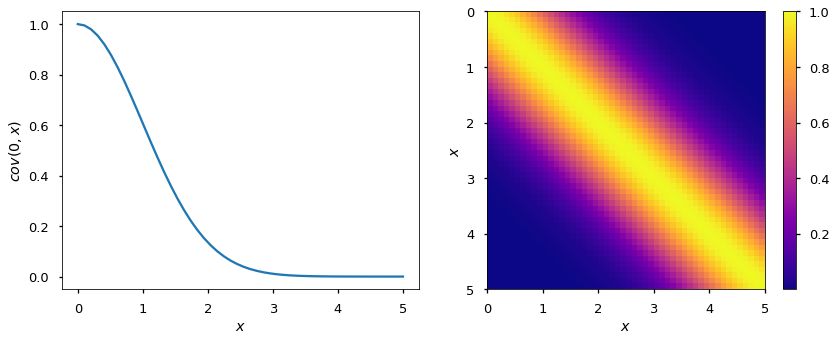

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
import seaborn as sns
sns.set_context('talk')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
xrange = np.linspace(0, 5)
ax1.plot(xrange, exponential_cov(0, xrange, [1, 1]))
ax1.set_xlabel('$x$')
ax1.set_ylabel('$cov(0, x)$')

z = np.array([exponential_cov(xrange, xprime, [1, 1]) for xprime in xrange])
ims = ax2.imshow(z, cmap="plasma", 
       interpolation='none', 
       extent=(0, 5, 5, 0))
ax2.set_xlabel('$x$')
ax2.set_ylabel('$x$')
plt.colorbar(ims, ax=ax2)

plt.tight_layout();

It may seem odd to simply adopt the zero function to represent the mean function of the Gaussian process -- surely we can do better than that! It turns out that most of the learning in the GP involves the covariance function and its parameters, so very little is gained in specifying a complicated mean function.

For a finite number of points, the GP becomes a multivariate normal, with the mean and covariance as the mean functon and covariance function evaluated at those points.

For example, consider just two points from a squared exponential covariance function with parameters $\theta_1=1, \theta_2=2$, sampled at locations $x_1=0$ and $x_2=0.6$.

In [3]:
from functools import partial

K = partial(exponential_cov, params=[1, 2])

The corresponding covariance matrix is this:

In [4]:
cov = np.array([[K(0, 0), K(0, 0.6)], 
                [K(0.6, 0), K(0.6, 0.6)]])
cov

array([[ 1.        ,  0.69767633],
       [ 0.69767633,  1.        ]])

Let's consider a value of -1 sampled from $x_1$. According to our model, there is a dependence regarding where $x_2$ will be located, governed by the covariance of the two variables.

In [5]:
cov[1,1]

1.0

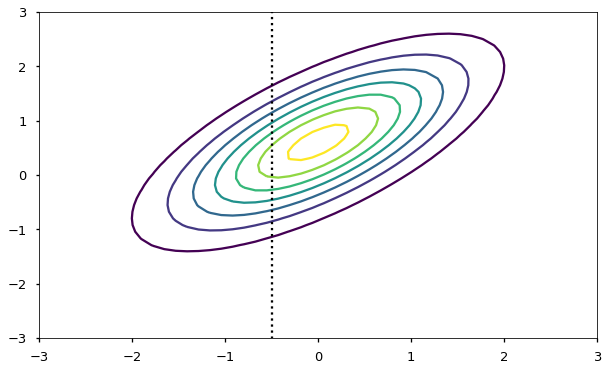

In [6]:
# Visualizing the bivariate Gaussian distribution contour
# bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0, mux=0.0, muy=0.0, sigmaxy=0.0)

plt.figure(figsize =(10, 6))
from matplotlib.mlab import bivariate_normal

x = np.linspace(-3.0, 3.0)
y = np.linspace(-3.0, 3.0)
X, Y = np.meshgrid(x, y)

Z = bivariate_normal(X, Y, cov[0,0], cov[1,1], 0.0, 0.6, cov[0,1])
plt.contour(X,Y,Z)
plt.vlines(-0.5, -4, 4, linestyles=':')
plt.xlim(-3, 3); plt.ylim(-3, 3);

We can apply the normal distribution of $x_2|x_1$ from above to see how $x_2$ is constrained:

$$p(x_2|x_1) = \mathcal{N}(\mu_{x_1} + \Sigma_{x_1 x_2}\Sigma_{x_2}^{-1}(x_2-\mu_{x_2}), 
\Sigma_{x_1}-\Sigma_{x_1 x_2}\Sigma_{x_2}^{-1}\Sigma_{x_1 x_2}^T)$$

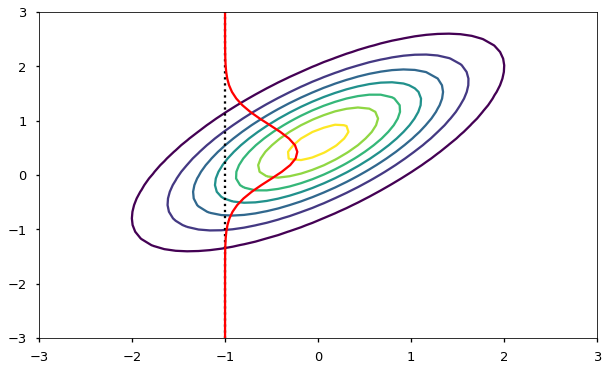

In [7]:
plt.figure(figsize =(10, 6))
import scipy as sp

plt.contour(X,Y,Z)
plt.vlines(-1, -4, 4, linestyles=':')
plt.plot(sp.stats.norm(0 + (cov[1,0]/cov[1,1]) * (0.6 - 0), cov[0,0] - cov[1,0]**2/cov[1,1]).pdf(x) - 1, x, 'r')
plt.xlim(-3, 3); plt.ylim(-3, 3);

Notice that if we change the covariance function (either the form or the parameterization), we will change the dependence among points separated by a given distance. We will look at alternate forms of the covariance function a little later on.

## Sampling from a Gaussian Process Prior

To make this notion of a "distribution over functions" more concrete, let's quickly demonstrate how we obtain realizations from a Gaussian process, which result in an evaluation of a function over a set of points. All we will do here is sample from the *prior* Gaussian process, so before any data have been introduced. What we need first is our covariance function, which will be the squared exponential, and a function to evaluate the covariance at given points (resulting in a covariance matrix).

We are going generate realizations sequentially, point by point, using the lovely conditioning property of mutlivariate Gaussian distributions. Here is that conditional:

$$p(x|y) = \mathcal{N}(\mu_x + \Sigma_{xy}\Sigma_y^{-1}(y-\mu_y), 
\Sigma_x-\Sigma_{xy}\Sigma_y^{-1}\Sigma_{xy}^T)$$

And this the function that implements it:

In [8]:
def conditional(x_new, x, y, params):
    B = exponential_cov(x_new, x, params)
    C = exponential_cov(x, x, params)
    A = exponential_cov(x_new, x_new, params)
    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    return(mu.squeeze(), sigma.squeeze())

We will start with a Gaussian process prior with hyperparameters $\theta_0=1, \theta_1=10$. We will also assume a zero function as the mean, so we can plot a band that represents one standard deviation from the mean.



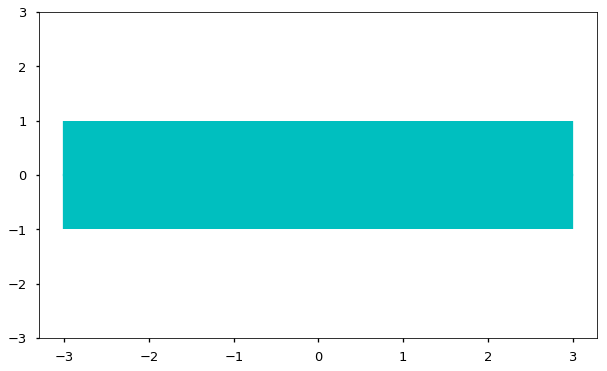

In [9]:
plt.figure(figsize =(10, 6))
θ = [1, 10]
σ_0 = exponential_cov(0, 0, θ)
xpts = np.arange(-3, 3, step=0.01)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=σ_0, capsize=0, color = 'c')
plt.ylim(-3, 3);

Let's select an arbitrary starting point to sample, say $x=1$. Since there are no prevous points, we can sample from an unconditional Gaussian:

In [10]:
np.random.seed(42)

x = [1.]
y = [np.random.normal(scale=σ_0)]
y

[0.4967141530112327]

We can now update our confidence band, given the point that we just sampled, using the covariance function to generate new point-wise intervals, conditional on the value $[x_0, y_0]$. 

In [11]:
σ_1 = exponential_cov(x, x, θ)

In [12]:
def predict(x, data, kernel, params, sigma, t):
    k = [kernel(x, y, params) for y in data]
    Sinv = np.linalg.inv(sigma)
    y_pred = np.dot(k, Sinv).dot(t)
    sigma_new = kernel(x, x, params) - np.dot(k, Sinv).dot(k)
    return y_pred, sigma_new

In [13]:
x_pred = np.linspace(-3, 3, 1000)
predictions = [predict(i, x, exponential_cov, θ, σ_1, y) for i in x_pred]

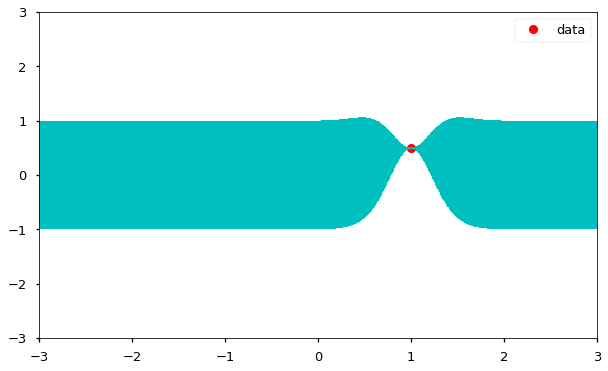

In [14]:
plt.figure(figsize =(10, 6))
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0, color = 'c')
plt.plot(x, y, "ro")
plt.xlim(-3, 3); plt.ylim(-3, 3);
plt.legend(['data'])

From here we can see that the sample point which is the **prior** was refined to a **posterior distribution** just like in the case with the child. It shows that the function is no longer flat but rather close to the datapoint/sample point. We can also see that around the datapoint we sampled, we now have an increased confidence. 

As we go through this process and get more and more data, we are scribing out a smooth regression function and we are getting more confident about the envelopes around it. Intuitively, that is a **Gaussian Process**. 

In [15]:
m, s = conditional([-0.7], x, y, θ)
y2 = np.random.normal(m, s)
y2

-0.1382640378102619

This point is added to the realization, and can be used to further update the location of the next point.

In [16]:
x.append(-0.7)
y.append(y2)

In [17]:
σ_2 = exponential_cov(x, x, θ)

predictions = [predict(i, x, exponential_cov, θ, σ_2, y) for i in x_pred]

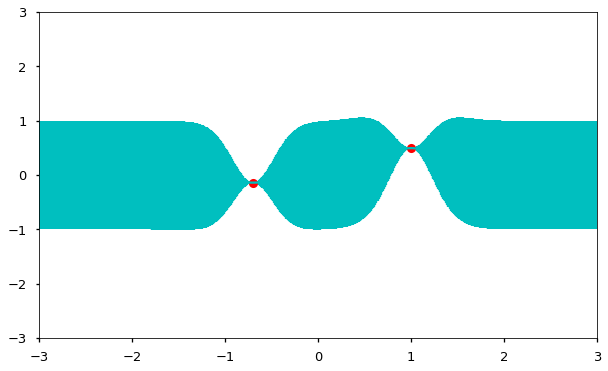

In [18]:
plt.figure(figsize =(10, 6))
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0, color = 'c')
plt.plot(x, y, "ro")
plt.xlim(-3, 3); plt.ylim(-3, 3);

Of course, sampling sequentially is just a heuristic to demonstrate how the covariance structure works. We can just as easily sample several points at once:

In [19]:
x_more = [-2.1, -1.5, 0.3, 1.8, 2.5]
mu, s = conditional(x_more, x, y, θ)
y_more = np.random.multivariate_normal(mu, s)
y_more

array([-1.5128756 ,  0.52371713, -0.13952425, -0.93665367, -1.29343995])

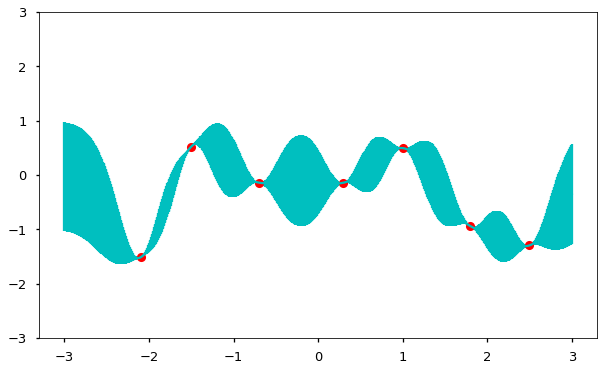

In [20]:
plt.figure(figsize =(10, 6))

x += x_more
y += y_more.tolist()

σ_new = exponential_cov(x, x, θ)

predictions = [predict(i, x, exponential_cov, θ, σ_new, y) for i in x_pred]

y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0, color = 'c')
plt.plot(x, y, "ro")
plt.ylim(-3, 3);

So as the density of points becomes high, the result will be one realization (function) from the prior GP. 

This example, of course, is trivial because it is simply a random function drawn from the prior. What we are really interested in is *learning* about an underlying function from information residing in our data. In a parametric setting, we either specify a likelihood, which we then maximize with respect to the parameters, of a full probability model, for which we calculate the posterior in a Bayesian context. Though the integrals associated with posterior distributions are typically intractable for parametric models, they do not pose a problem with Gaussian processes.

In [21]:
x = np.linspace(-3, 3, 10)
σ_n = exponential_cov(x, x, θ)

In [22]:
m, s = conditional(x, [], [], θ)
y = np.random.multivariate_normal(m, s)

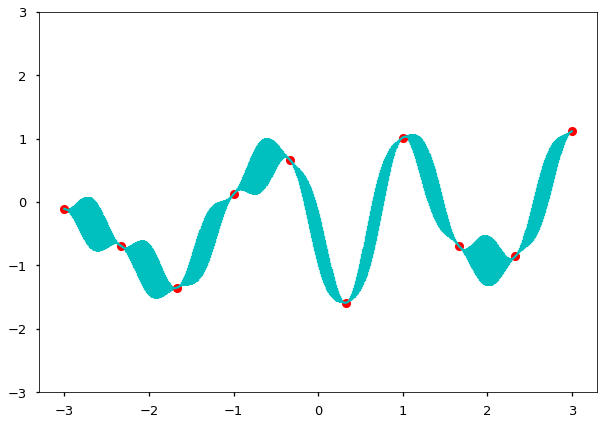

In [23]:
plt.figure(figsize =(10, 7))
plt.plot(x, y, "ro")
predictions = [predict(i, x, exponential_cov, θ, σ_n, y) for i in x_pred]
y_pred, sigmas = np.transpose(predictions)
plt.errorbar(x_pred, y_pred, yerr=sigmas, capsize=0, color = 'c')
plt.ylim(-3, 3);

Here is a sample of 10 realizations, predicted over a denser set of x-values:

Text(0,0.5,'y')

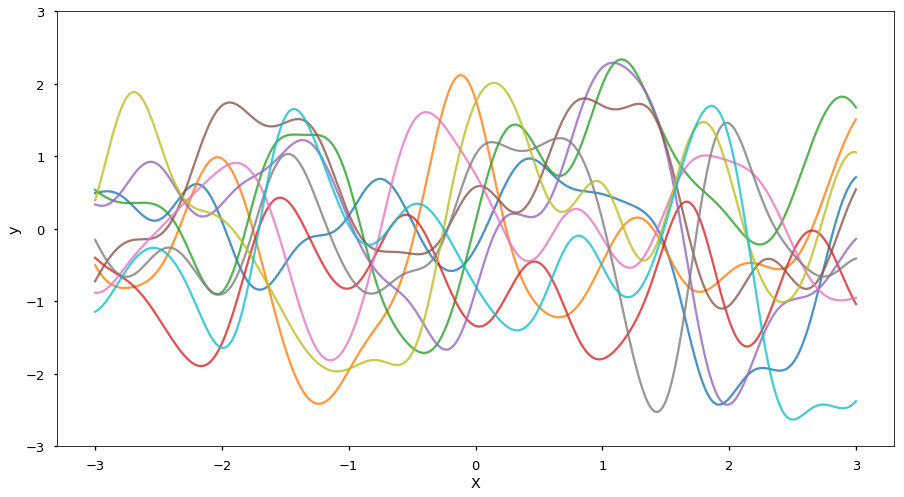

In [24]:
plt.figure(figsize =(15, 8))
x = np.linspace(-3, 3) 
σ_n = exponential_cov(x, x, θ)
m, s = conditional(x, [], [], θ)

for i in range(10):
    y = np.random.multivariate_normal(m, s)
    predictions = [predict(i, x, exponential_cov, θ, σ_n, y) for i in x_pred]
    y_pred, sigmas = np.transpose(predictions)
    plt.plot(x_pred, y_pred, alpha=0.8)
    plt.ylim(-3, 3)

plt.xlabel('X'); plt.ylabel('y')

While Univariate Gaussians are distributions over real valued variables, multivariate Gaussians are pairs or finite numbers of distributions over real valued variables, Gaussina processes are functions (infinite number of distibutions over real valued variables. This in general drives us to a notion called **regression**. 

Regressions are quite good for denoising and smoothing. They do not follow every noise in the data. They are also good at predicting and forecasting. For example, we might be interested and want to know what our temperature would be at a particular time in the future. However, regression sometimes have what is called danger of parametric models. For example, trying to fit a quadractic model to a data may lead to the model missing out some important features. There are also dangers of overfitting and underfitting. Thare are the areas **Gaussian processes** really shine because they take care of these issues very well. 

---

## References

- [Rasmussen, C. E., & Williams, C. K. I. (2005). Gaussian Processes for Machine Learning (Adaptive Computation and Machine Learning series). The MIT Press.](http://www.amazon.com/books/dp/026218253X)
- Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., & Rubin, D. B. (2013). Bayesian Data Analysis, Third Edition. CRC Press.
